# Proyecto Modulo 2

+ Integrante1: Corrales Camacho Cuauhtémoc
+ Integrante2: Sánchez Covarrubias Marco Antonio
+ Integrante3: 

### *"Análisis de rendimientos de compañías automotrices y predicciones de precios para el año 2020"*

**Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de corporaciones automovilísticas.

**Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas automotrices económicas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

**Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto conciste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas automototrices Ford, Volkswagen, Honda y Nissan generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

**Modelo del problema**

In [2]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Para importar los datos historícos se hará uso de una función que extraiga el cúmulo de datos del sitio web "Yahoo Finanzas". Dicha función requerirá los siguientes parámetros:
+ El nombre del conjunto de acciones (**names**).
+ La fecha de inicio de los datos (**start**).
+ La fecha de límite de los datos (**end**).

Al ejecutar dicha función se le agregará el operador "*.dropna*" para que las filas de valores que serán representados en una tabla de formato pandas no contengan celdas sin valores.

In [3]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [6]:
#Instrumentos
nombres=['F','VOW3.DE','HMC','NSANY']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-7-5'
# Función DataReader
cierres=get_close(nombres,fecha_inicio,fecha_fin).dropna()
print("Esta es la tabla de datos con la cual se trabajará")
cierres

Esta es la tabla de datos con la cual se trabajará


Symbols,F,HMC,NSANY,VOW3.DE
Date,,,,
2018-01-02,11.226595,33.041203,18.506634,156.690155
2018-01-03,11.315272,33.338268,18.700565,162.118057
2018-01-04,11.510363,33.980312,18.682095,164.954941
2018-01-05,11.705453,34.133633,18.829853,169.456100
2018-01-08,11.661115,34.306122,18.876028,170.061310
2018-01-09,11.599042,34.037807,18.968376,170.439560
2018-01-10,11.554701,34.766090,19.014551,168.510483
2018-01-11,11.669983,34.584023,19.162310,168.132233
2018-01-12,11.732057,34.430698,19.162310,170.042404


**Solución del problema y sus respectivas gráficas**

Los datos de la anterior tabla éstan representados por la gráfica debajo.


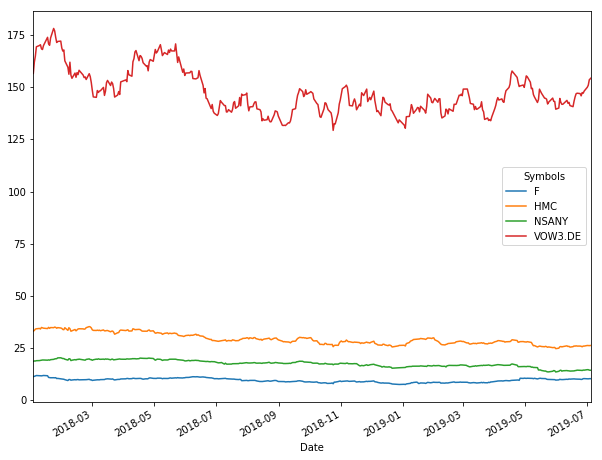

In [12]:
print("Los datos de la anterior tabla éstan representados por la gráfica debajo.")
cierres.plot(figsize=(10,8));

**En este caso, la simbología es la siguiente:**
+ *F* representa a Ford Motros Inc.
+ *HMC* representa a Honda Motors Corp.
+ *NSANY* representa a Nissan Motors Co.
+ *VOW3.DE* representa a Volkswagen AG.

**Analísis de los resultados y conclusiones**

**Referencias**